In [ ]:
from autograd import numpy
from autograd import grad
from matplotlib import pyplot
import pandas as pd

In [ ]:
train_df = pd.read_csv("winequality-red.csv")
test_df = pd.read_csv("winequality-red_test.csv")

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1439 non-null   float64
 1   volatile acidity      1439 non-null   float64
 2   citric acid           1439 non-null   float64
 3   residual sugar        1439 non-null   float64
 4   chlorides             1439 non-null   float64
 5   free sulfur dioxide   1439 non-null   float64
 6   total sulfur dioxide  1439 non-null   float64
 7   density               1439 non-null   float64
 8   pH                    1439 non-null   float64
 9   sulphates             1439 non-null   float64
 10  alcohol               1439 non-null   float64
 11  quality               1439 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 135.0 KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         160 non-null    float64
 1   volatile acidity      160 non-null    float64
 2   citric acid           160 non-null    float64
 3   residual sugar        160 non-null    float64
 4   chlorides             160 non-null    float64
 5   free sulfur dioxide   160 non-null    int64  
 6   total sulfur dioxide  160 non-null    int64  
 7   density               160 non-null    float64
 8   pH                    160 non-null    float64
 9   sulphates             160 non-null    float64
 10  alcohol               160 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 13.9 KB


In [ ]:
import seaborn

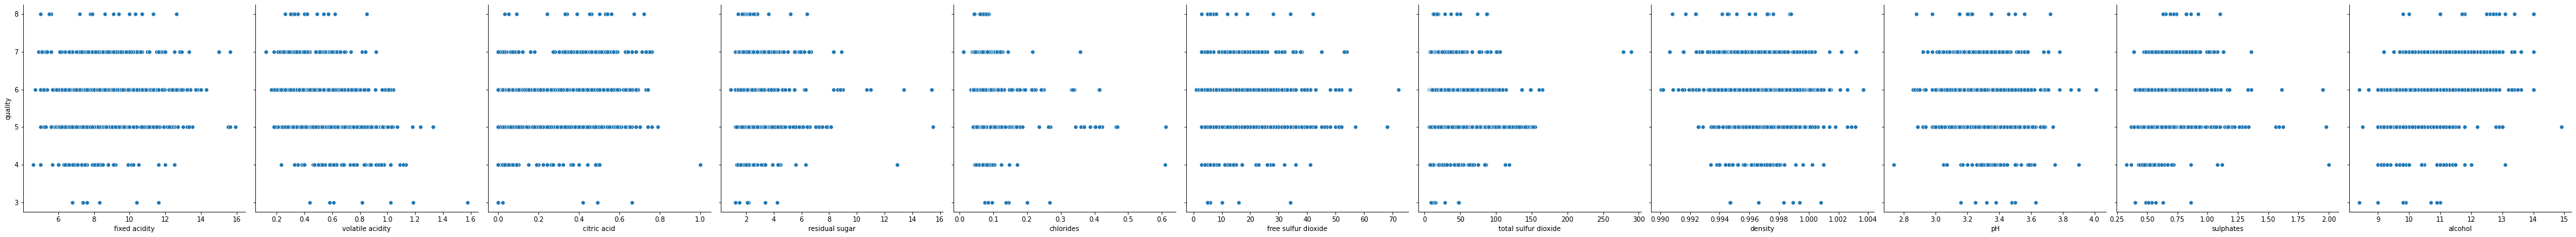

In [ ]:
seaborn.pairplot(data=train_df, height=5, aspect=1,
             x_vars=train_df.columns.drop('quality'),
             y_vars='quality');

In [ ]:
# + = alcohol, sulphates, critic acid

In [ ]:
bins = (0, 5, 10)
group_names = ['bad', 'good']
train_df['quality'] = pd.cut(train_df['quality'], bins = bins, labels = group_names)

In [ ]:
train_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [ ]:
test_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.3,0.670,0.02,2.20,0.072,31,92,0.99566,3.32,0.68,11.066667
1,7.2,0.370,0.32,2.00,0.062,15,28,0.99470,3.23,0.73,11.300000
2,7.4,0.785,0.19,5.20,0.094,19,98,0.99713,3.16,0.52,9.566667
3,6.9,0.630,0.02,1.90,0.078,18,30,0.99712,3.40,0.75,9.800000
4,6.9,0.580,0.20,1.75,0.058,8,22,0.99322,3.38,0.49,11.700000


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [ ]:
train_df['quality'] = label_quality.fit_transform(train_df['quality'])

In [ ]:
train_df['quality'].value_counts()

1    769
0    670
Name: quality, dtype: int64

In [ ]:
X = train_df.drop(['quality','chlorides'], axis = 1)
y = train_df['quality']

In [ ]:
test_df = test_df.drop(['chlorides'], axis = 1)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state = 42, shuffle=False)

In [ ]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
1290,7.6,0.740,0.00,1.9,6.0,12.0,0.99521,3.36,0.59,11.0
1291,8.2,0.635,0.10,2.1,25.0,60.0,0.99638,3.29,0.75,10.9
1292,5.9,0.395,0.13,2.4,14.0,28.0,0.99362,3.62,0.67,12.4
1293,7.5,0.755,0.00,1.9,6.0,12.0,0.99672,3.34,0.49,9.7


In [ ]:
X_val

,fixed acidity,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1295,6.6,0.630,0.00,4.3,51.0,77.5,0.99558,3.20,0.45,9.5
1296,6.6,0.630,0.00,4.3,51.0,77.5,0.99558,3.20,0.45,9.5
1297,7.2,0.530,0.14,2.1,15.0,29.0,0.99323,3.35,0.61,12.1
1298,5.7,0.600,0.00,1.4,11.0,18.0,0.99191,3.45,0.56,12.2
1299,7.6,1.580,0.00,2.1,5.0,9.0,0.99476,3.50,0.40,10.9
...,...,...,...,...,...,...,...,...,...,...
1434,10.2,0.540,0.37,15.4,55.0,95.0,1.00369,3.18,0.77,9.0
1435,10.2,0.540,0.37,15.4,55.0,95.0,1.00369,3.18,0.77,9.0
1436,10.0,0.380,0.38,1.6,27.0,90.0,0.99914,3.15,0.65,8.5
1437,6.8,0.915,0.29,4.8,15.0,39.0,0.99577,3.53,0.54,11.1


In [ ]:
y_train

0       0
1       0
2       0
3       1
4       0
       ..
1290    0
1291    1
1292    1
1293    0
1294    1
Name: quality, Length: 1295, dtype: int64

In [ ]:
y_val

1295    0
1296    0
1297    1
1298    1
1299    0
       ..
1434    1
1435    1
1436    0
1437    0
1438    0
Name: quality, Length: 144, dtype: int64

In [ ]:
def logistic(x):
    out = 1. / (1. + numpy.exp(-x))

    return out

In [ ]:
def logistic_model(x, params):
    out = logistic(numpy.dot(x, params[0]) + params[1])

    return out

In [ ]:
def model_loss(x, true_labels, params, _lambda=1.0):
    pred = logistic_model(x, params)
    
    loss = - (
        numpy.dot(true_labels, numpy.log(pred+1e-15)) +
        numpy.dot(1.-true_labels, numpy.log(1.-pred+1e-15))
    ) + _lambda * numpy.sum(params[0]**2)
    
    return loss

In [ ]:
# calculate mu and sigma
mu = numpy.mean(X_train, axis=0)
sigma = numpy.std(X_train, axis=0)

# normalize the training, validation, and test datasets
X_train = (X_train - mu) / sigma
X_val = (X_val - mu) / sigma
test_df = (test_df - mu) / sigma

In [ ]:
def performance(predictions, answers, beta=1.0):
    """Calculate precision, recall, and F-score.
    
    Arguments
    ---------
    predictions : numpy.ndarray of integers
        The predicted labels.
    answers : numpy.ndarray of integers
        The true labels.
    beta : float
        A coefficient representing the weight of recall.
    
    Returns
    -------
    precision, recall, score, accuracy : float
        Precision, recall, and F-score, accuracy respectively.
    """
    true_idx = (answers == 1)  # the location where the answers are 1
    false_idx = (answers == 0)  # the location where the answers are 0
    
    # true positive: answers are 1 and predictions are also 1
    n_tp = numpy.count_nonzero(predictions[true_idx] == 1)
    
    # false positive: answers are 0 but predictions are 1
    n_fp = numpy.count_nonzero(predictions[false_idx] == 1)
    
    # true negative: answers are 0 and predictions are also 0
    n_tn = numpy.count_nonzero(predictions[false_idx] == 0)
    
    # false negative: answers are 1 but predictions are 0
    n_fn = numpy.count_nonzero(predictions[true_idx] == 0)
    
    # precision, recall, and f-score
    precision = n_tp / (n_tp + n_fp)
    recall = n_tp / (n_tp + n_fn)
    score = (
        (1.0 + beta**2) * precision * recall / 
        (beta**2 * precision + recall)
    )

    accuracy = (n_tp + n_tn) / (n_tp + n_fn + n_fp + n_tn)

    return precision, recall, score, accuracy

In [ ]:
# a function to get the gradients of a logistic model
gradients = grad(model_loss, argnum=2)

# initialize parameters
w = numpy.zeros(X_train.shape[1], dtype=float)
b = 0.

In [ ]:
X_train = X_train.values
y_train = y_train.values
X_val = X_val.values
y_val = y_val.values

In [ ]:
def classify(x, params):
    probabilities = logistic_model(x, params)
    labels = (probabilities >= 0.5).astype(float)
    return labels

In [ ]:
# initial accuracy
pred_labels_test = classify(X_train, (w, b))
perf = performance(pred_labels_test, y_train)

print("Initial precision: {:.1f}%".format(perf[0]*100))
print("Initial recall: {:.1f}%".format(perf[1]*100))
print("Initial F-score: {:.1f}%".format(perf[2]*100))
print("Initial Accuracy: {:.1f}%".format(perf[3]*100))

Initial precision: 67.8%
Initial recall: 50.4%
Initial F-score: 57.8%
Initial Accuracy: 60.1%


In [ ]:
labels_train = numpy.zeros(X_train.shape[0])

In [ ]:
n_y_train = sum(y_train == 1)

In [ ]:
labels_train[n_y_train:] = 1.

In [ ]:
labels_val = numpy.zeros(X_val.shape[0])

In [ ]:
n_y_val = sum(y_val == 1)

In [ ]:
labels_val[n_y_val:] = 1.

In [ ]:
# learning rate
lr = 1e-5

# a variable for the change in validation loss
change = numpy.inf

# a counter for optimization iterations
i = 0

# a variable to store the validation loss from the previous iteration
old_val_loss = 1e-15

# keep running if:
#   1. we still see significant changes in validation loss
#   2. iteration counter < 10000
while change >= 1e-5 and i < 10000:
    
    # calculate gradients and use gradient descents
    grads = gradients(X_train, labels_train, (w, b))
    w -= (grads[0] * lr)
    b -= (grads[1] * lr)
    
    # validation loss
    val_loss = model_loss(X_val, labels_val, (w, b))
    
    # calculate f-scores against the validation dataset
    pred_labels_val = classify(X_val, (w, b))
    score = performance(pred_labels_val, labels_val)

    # calculate the chage in validation loss
    change = numpy.abs((val_loss-old_val_loss)/old_val_loss)

    # update the counter and old_val_loss
    i += 1
    old_val_loss = val_loss
    
    # print the progress every 10 steps
    if i % 10 == 0:
        print("{}...".format(i), end="")

print("")
print("")
print("Upon optimization stopped:")
print("    Iterations:", i)
print("    Validation loss:", val_loss)
print("    Validation precision:", score[0])
print("    Validation recall:", score[1])
print("    Validation F-score:", score[2])
print("    Validation Accuracy:", score[3])
print("    Change in validation loss:", change)



Upon optimization stopped:
    Iterations: 2
    Validation loss: 134.77862554207553
    Validation precision: 0.4731182795698925
    Validation recall: 0.5641025641025641
    Validation F-score: 0.5146198830409358
    Validation Accuracy: 0.4236111111111111
    Change in validation loss: 9.891378470727823e-06


In [ ]:
labels_test = numpy.zeros(test_df.shape[0])
n_test_value = int(test_df.shape[0]*score[3])
labels_test[n_test_value:] = 1.

In [ ]:
n_test_value

67

In [ ]:
# final accuracy
pred_labels_test = classify(test_df, (w, b))
perf = performance(pred_labels_test, labels_test)

print("Final precision: {:.1f}%".format(perf[0]*100))
print("Final recall: {:.1f}%".format(perf[1]*100))
print("Final F-score: {:.1f}%".format(perf[2]*100))
print("Final Accuracy: {:.1f}%".format(perf[3]*100))

Final precision: 62.4%
Final recall: 78.5%
Final F-score: 69.5%
Final Accuracy: 60.0%


In [ ]:
submission = pd.DataFrame({
        "ID": test_df.index+1,
        "quality": pred_labels_test
    })

In [ ]:
submission.to_csv('submission.csv',index = False)

In [ ]:
k = pd.read_csv('submission.csv')

In [ ]:
k

,ID,quality
0,1,1.0
1,2,1.0
2,3,0.0
3,4,0.0
4,5,1.0
...,...,...
155,156,1.0
156,157,1.0
157,158,1.0
158,159,1.0
